In [2]:
%matplotlib notebook
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def autocorrelogram(y, window):
    b, e = window
    a = np.array([np.dot(y[0 : y.size - tau], y[tau :]) for tau in range(b, e)])
    a /= np.dot(y, y)
    return a

In [15]:
def find_pitch(y, sr, lowest_freq = 100.):
    cor = autocorrelogram(y, [0, int(sr / lowest_freq)])
    peaks = []
    for a in np.split(np.arange(cor.size), np.nonzero(cor < 0)[0].tolist())[1 :]:
        u = [i for i in a if cor[i] > .01]
        if u:
            peaks.append(max(u, key = lambda i: cor[i]))
    highest_peak = max(cor[p] for p in peaks)
    f = np.array([p for p in peaks if cor[p] > .9 * highest_peak])
    d = np.average(f / np.arange(1, f.size + 1), 0, cor[f])
    return sr / d

In [19]:
y, sr = librosa.load('audio3.wav', sr = None)

In [20]:
find_pitch(y, sr)

196.875

<IPython.core.display.Javascript object>


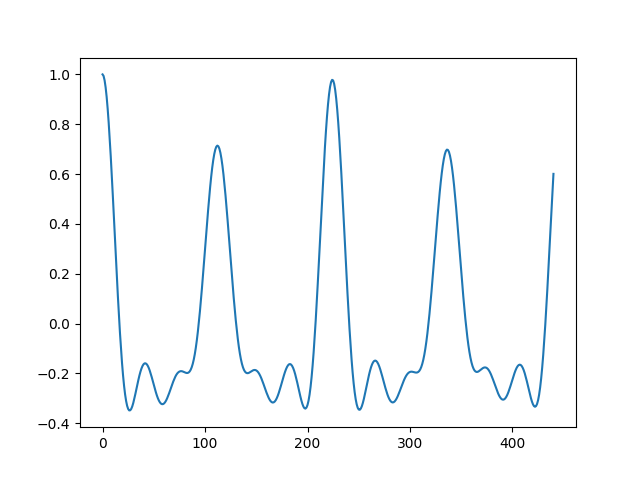

In [21]:
a = autocorrelogram(y, [0, int(sr / 100)])
plt.plot(a)

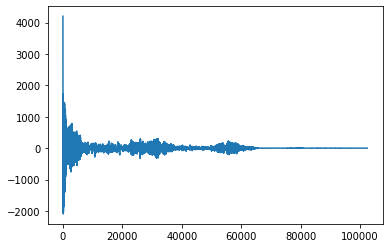

In [176]:
plt.plot(librosa.autocorrelate(y))

In [3]:
import pyaudio
import wave

In [4]:
from collections import deque

In [5]:
def bytes_to_wav(b):
    return np.frombuffer(b, dtype = np.int16).astype(float) / (2 ** 15)

<IPython.core.display.Javascript object>


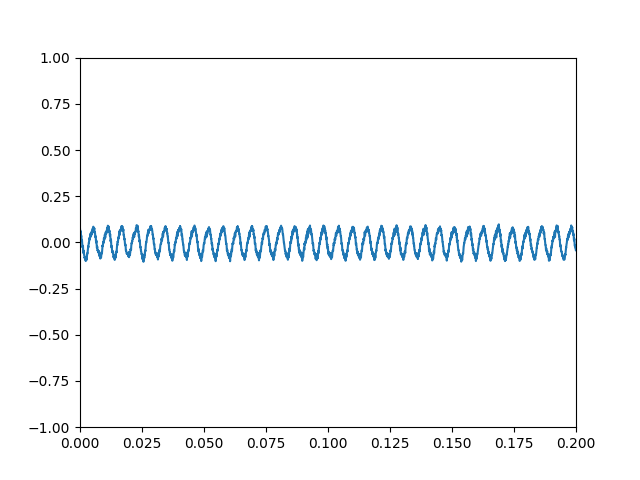

In [15]:
RATE = 44100
CHUNK = 4096
ONE_SEC = RATE / CHUNK
TIME_WINDOW = .2
QLEN = int(TIME_WINDOW * ONE_SEC)

audio = pyaudio.PyAudio()
mic = audio.open(
    format = pyaudio.paInt16,
    channels = 1,
    rate = RATE,
    input = True,
    frames_per_buffer = CHUNK)

frames = deque()

x = np.linspace(0, TIME_WINDOW, QLEN * CHUNK)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.axis([0, TIME_WINDOW, -1, 1])
line, = ax.plot(x, np.zeros(x.shape))

for i in range(int(20 * ONE_SEC)):
    data = mic.read(CHUNK)
    frames.append(data)
    if len(frames) > QLEN:
        frames.popleft()
        line.set_ydata(bytes_to_wav(b''.join(frames)))
        fig.canvas.draw()
    
mic.stop_stream()
mic.close()
audio.terminate()

In [14]:
with wave.open('mic.wav', 'wb') as fout:
    fout.setnchannels(1)
    fout.setsampwidth(audio.get_sample_size(pyaudio.paInt16))
    fout.setframerate(44100)
    fout.writeframes(b)

NameError: name 'b' is not defined

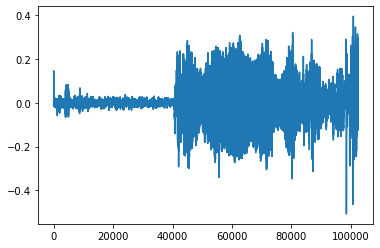

In [200]:
plt.plot(np.frombuffer(b, dtype = np.int16).astype(float) / (2 ** 15))

<IPython.core.display.Javascript object>


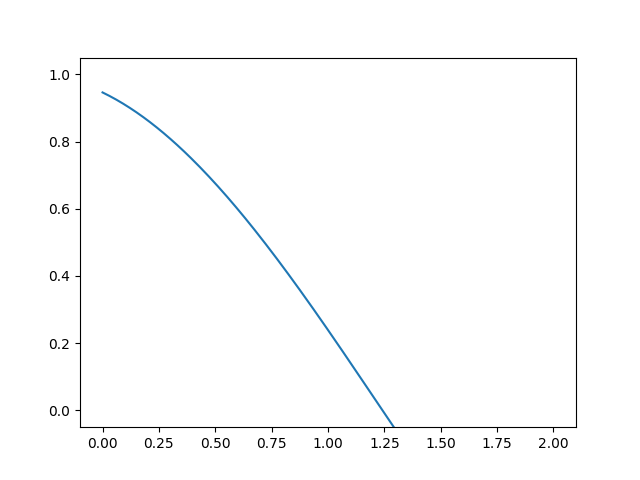

In [359]:
x = np.linspace(0, 2, 200)
fig = plt.figure()
ax = fig.add_subplot(111)
line, = ax.plot(x, np.sin(x))
for i in np.arange(1,20):
    line.set_ydata(np.sin(x+i/10.0))
    fig.canvas.draw()

In [11]:
np.round(np.log2(np.array([float('nan'),1.5]))).astype(int)

array([-9223372036854775808,                    1])